In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import pie,axis,show
import seaborn as sns


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
pwd

'/content'

In [0]:
devices=pd.read_csv('/content/devices.csv')
notifications=pd.read_csv('/content/notifications.csv')
users=pd.read_csv('/content/users.csv')

In [4]:
print('the shape of devices is: ',devices.shape)
print('the shape of notifications is: ',notifications.shape)
print('the shape of users is: ',users.shape)

the shape of devices is:  (15544, 2)
the shape of notifications is:  (97704, 5)
the shape of users is:  (15544, 12)


In [0]:
devices = devices.set_index('user_id')

In [0]:
df=pd.merge(users,devices,on='user_id')

In [0]:
userdf=df.set_index('user_id')

In [8]:
userdf.head(2)

,birth_year,country,city,created_date,user_settings_crypto_unlocked,plan,attributes_notifications_marketing_push,attributes_notifications_marketing_email,num_contacts,num_referrals,num_successful_referrals,brand
user_id,,,,,,,,,,,,
user_0,1992,ES,Madrid,2018-09-10 18:46:42.843855,0,STANDARD,1.0,1.0,3,0,0,Apple
user_1,1985,LT,Klaipeda,2018-01-11 18:53:10.531146,1,STANDARD,NaN,NaN,75,0,0,Apple


In [9]:
userdf.describe()

,birth_year,user_settings_crypto_unlocked,attributes_notifications_marketing_push,attributes_notifications_marketing_email,num_contacts,num_referrals,num_successful_referrals
count,15544.000000,15544.000000,10284.000000,10284.000000,15544.000000,15544.0,15544.0
mean,1983.666624,0.182385,0.948269,0.895469,17.874228,0.0,0.0
std,11.369184,0.386174,0.221494,0.305963,47.549929,0.0,0.0
min,1929.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0
25%,1977.000000,0.000000,1.000000,1.000000,0.000000,0.0,0.0
50%,1986.000000,0.000000,1.000000,1.000000,5.000000,0.0,0.0
75%,1992.000000,0.000000,1.000000,1.000000,19.000000,0.0,0.0
max,2001.000000,1.000000,1.000000,1.000000,2918.000000,0.0,0.0


In [10]:
userdf.dtypes

birth_year                                    int64
country                                      object
city                                         object
created_date                                 object
user_settings_crypto_unlocked                 int64
plan                                         object
attributes_notifications_marketing_push     float64
attributes_notifications_marketing_email    float64
num_contacts                                  int64
num_referrals                                 int64
num_successful_referrals                      int64
brand                                        object
dtype: object

In [11]:
userdf.isnull().sum()

birth_year                                     0
country                                        0
city                                           0
created_date                                   0
user_settings_crypto_unlocked                  0
plan                                           0
attributes_notifications_marketing_push     5260
attributes_notifications_marketing_email    5260
num_contacts                                   0
num_referrals                                  0
num_successful_referrals                       0
brand                                          0
dtype: int64

filling the NANS in email


In [12]:
# apo tous 15544 xrhstes oi 14394 (92.6%) einai standard, kai oi upoloipoi 1150 (7.3%) einai paid
userdf['plan'].value_counts()

STANDARD    14394
SILVER        713
GOLD          437
Name: plan, dtype: int64

In [13]:
#oson afora to an exoun dextei na dexontai mail
#oson afora tous 830 paid xrhstes: oi 73 (6.3%) den exoun dextei 
                             # oi 757 (65.8%) exoun dextei
#oson afora tous 9454 standard xrhstes: oi 1002 (6.9%) den exoun dextei 
                             # oi 8452 (58.7%) exoun dextei
pd.crosstab(index=userdf['attributes_notifications_marketing_email'],columns=userdf['plan'])

plan,GOLD,SILVER,STANDARD
attributes_notifications_marketing_email,,,
0.0,23,50,1002
1.0,355,402,8452


In [14]:
#parathrw oti 320 xrhstes oi opoioi einai paid exoun timi nan kai epishs 4940 xrhstes standard exoun epishs timh nan
pd.crosstab(index=userdf['attributes_notifications_marketing_email'].isnull(),columns=userdf['plan'])

plan,GOLD,SILVER,STANDARD
attributes_notifications_marketing_email,,,
False,378,452,9454
True,59,261,4940


In [0]:
##ara tha gemisw posostiaia tis nan times kai tha thewrisw oti apo tous 320 paid xristes me nan oi 292(91.25%) tha dextoun (=1) enw oi 28(8.75%) oxi (=0)
##kai oson afora tous standard apo tous 4940 me nan times tha thewrisw tous 4416(90%) oti tha dextoun (=1) enw oi 524(10%) oxi (=0) 

filling the NANS in push

In [16]:
# apo tous 15544 xrhstes oi 14394 (92.6%) einai standard, kai oi upoloipoi 1150 (7.3%) einai paid
userdf['plan'].value_counts()

STANDARD    14394
SILVER        713
GOLD          437
Name: plan, dtype: int64

In [17]:
#oson afora to an exoun dextei na dexontai push notifications
#oson afora tous 830 paid xrhstes: oi 46 (5.5%) den exoun dextei 
                             # oi 784 (94.5%) exoun dextei
#oson afora tous 9454 standard xrhstes: oi 486 (5%) den exoun dextei 
                             # oi 8968 (95%) exoun dextei
pd.crosstab(index=userdf['attributes_notifications_marketing_push'],columns=userdf['plan'])

plan,GOLD,SILVER,STANDARD
attributes_notifications_marketing_push,,,
0.0,14,32,486
1.0,364,420,8968


In [18]:
#parathrw oti 320 xrhstes oi opoioi einai paid exoun timi nan kai epishs 4940 xrhstes standard exoun epishs timh nan
pd.crosstab(index=userdf['attributes_notifications_marketing_push'].isnull(),columns=userdf['plan'])

plan,GOLD,SILVER,STANDARD
attributes_notifications_marketing_push,,,
False,378,452,9454
True,59,261,4940


In [0]:
##ara tha gemisw posostiaia tis nan times kai tha thewrisw oti apo tous 320 paid xristes me nan oi 305(95.5%) tha dextoun (=1) enw oi 15(5%) oxi (=0)
##kai oson afora tous standard apo tous 4940 me nan times tha thewrisw tous 4693(95%) oti tha dextoun (=1) enw oi 247(5%) oxi (=0)

more data analysis

In [20]:
userdf['num_referrals'].value_counts()

0    15544
Name: num_referrals, dtype: int64

In [21]:
userdf['num_successful_referrals'].value_counts()

0    15544
Name: num_successful_referrals, dtype: int64

In [0]:
# i notice that both of the above columns have the same value so i can't take valuable information from them so:
userdf=userdf.drop('num_referrals',axis=1)

In [0]:
userdf=userdf.drop('num_successful_referrals',axis=1)

In [0]:
def change(x):              #function to encode plan to 'paid' and 'standard'
  if x == 'STANDARD':
    return 0
  elif x == 'SILVER':
    return 1
  else:
    return 1

In [25]:
pd.crosstab(index=userdf['brand'],columns=userdf['plan'])

plan,GOLD,SILVER,STANDARD
brand,,,
Android,152,302,7346
Apple,282,405,7025
Unknown,3,6,23


In [0]:
def changebrand(x):       #function to encode brand into Apple and Android
  if x=='Apple':
    return 1
  else:
    return 0

In [0]:
userdf['birth_year'] =2020 - (userdf[['birth_year']]) #transforming birth year

In [34]:
userdf['country'].unique()

array(['ES', 'LT', 'IE', 'GB', 'MT', 'FR', 'RO', 'PL', 'AT', 'IT', 'SI',
       'CZ', 'BE', 'BG', 'GI', 'CH', 'GG', 'CY', 'LV', 'DE', 'SK', 'GR',
       'DK', 'PT', 'LU', 'HR', 'NL', 'NO', 'SE', 'AU', 'IM', 'FI', 'EE',
       'JE', 'HU', 'RE', 'IS', 'GP', 'LI', 'MQ'], dtype=object)

In [0]:
def change_country(x):     #function to cluster the countries
  if x=='IE' or x=='GB' or x=='AT' or x=='BE' or x=='GG' or x=='LV' or x=='DE' or x=='DK' or x=='LU' or x=='NL' or x=='NO' or x=='SE' or x=='IM' or x=='FI' or x=='JE' or x=='IS':
    return NorthEurope
  elif x=='MT' or x=='IT' or x=='SI' or x=='BG' or x=='CY' or x=='GR' or x=='HR':
    return SouthEurope
  elif x=='AU':
    return Australia
  elif x=='LT' or x=='RO' or x=='PL' or x=='CZ' or x=='SK' or x=='EE' or x=='HU':
    return EastEurope
  elif x=='ES' or x=='FR' or x=='GI' or x=='CH' or x=='PT' or x=='RE' or x=='GP' or x=='LI' or x=='MQ':
    return WestEurope

In [39]:
userdf['city'].value_counts()

London                      1342
Warszawa                     330
Paris                        292
Dublin                       286
Vilnius                      271
                            ... 
Santa Coloma de Gramenet       1
Kinross                        1
HERAKLION CRETE                1
San Agustin Del Guadalix       1
Veitshöchheim                  1
Name: city, Length: 5197, dtype: int64

In [0]:
userdf=userdf.drop('city',axis=1)

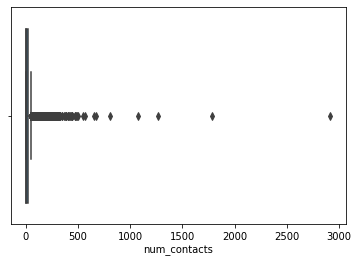

In [29]:
ax=sns.boxplot(x=userdf.num_contacts)
plt.show()

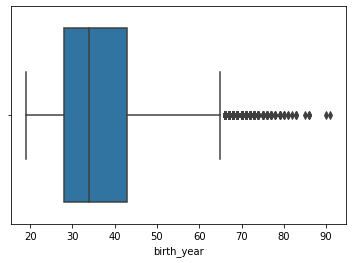

In [30]:
ax=sns.boxplot(x=userdf.birth_year)
plt.show()

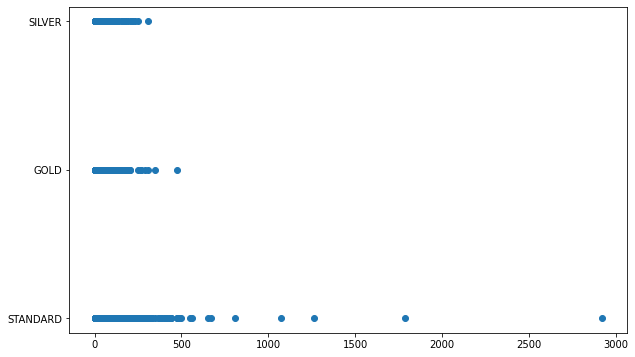

In [31]:
plt.figure(figsize=(10,6))
ax=plt.subplot(1,1,1)
ax.scatter(userdf['num_contacts'],userdf['plan'])

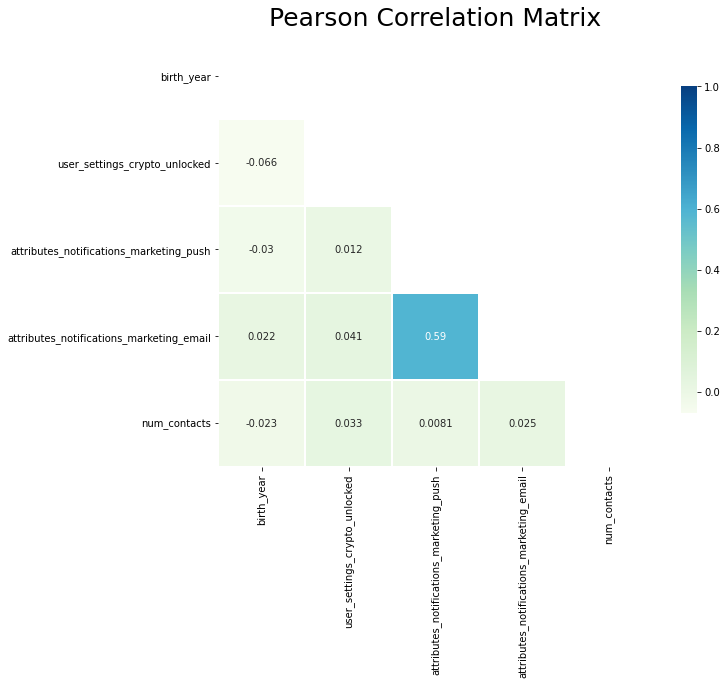

In [32]:
mask = np.zeros_like(userdf.corr(), dtype=np.bool) 
mask[np.triu_indices_from(mask)] = True 
f, ax = plt.subplots(figsize=(10, 8))
plt.title('Pearson Correlation Matrix',fontsize=25)

 

sns.heatmap(userdf.corr(),linewidths=0.25,vmax=1.0,square=True,cmap="GnBu", 
            linecolor='w',annot=True,mask=mask,cbar_kws={"shrink": .75});

In [49]:
df_for_example=userdf['country'].apply(change_country)

NameError: ignored

In [0]:
plt.figure(figsize=(5,5))
sns.heatmap(userdf.groupby(['plan','user_settings_crypto_unlocked']).birth_year.count().unstack(),annot=True,fmt='.0f')

In [0]:
from scipy.stats import pearsonr
import matplotlib.pyplot as plt

def corrfunc(x,y,ax=None,**kws):
  r,_=pearsonr(x,y)
  ax=ax or plt.gca()
  rho='\u03C1'
  ax.annotate(f'{rho} = {r:.2f}', xy=(.1, .9), xycoords=ax.transAxes)

In [0]:
ax=sns.pairplot(userdf,hue='plan')
ax.map_lower(corrfunc)
plt.show()

In [0]:
x=userdf.drop('country',axis=1)

In [0]:
def changebrand(x):
  if x=='Apple':
    return 1
  else:
    return 0

In [0]:
x['brand']=x['brand'].apply(changebrand)

In [0]:
x.head(2)

In [0]:
x=x.drop('created_date',axis=1)
         

In [0]:
x.head(1)

In [0]:
userdf